# Extension du Mini Projet Introduction au Deep Learning (Perceptron)
# Alexis Araujo

## Première Partie

In [216]:
from PIL import Image
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
#!pip install h5py
#from utilities import *
from tqdm import tqdm
import matplotlib.pyplot as plt
import h5py

In [217]:
import os
from sklearn.model_selection import train_test_split

def load_data_train(image_size=(64, 64)):
    # Chemin vers les répertoires des classes
    rose_path = 'donnees_basique/train/rose/'
    tulip_path = 'donnees_basique/train/tulip/'

    # Listes pour stocker les images et les étiquettes correspondantes
    images = []
    labels = []

    # Charger les images de la classe "rose"
    for filename in os.listdir(rose_path):
        img = Image.open(os.path.join(rose_path, filename))
        if img is not None:
            img = img.resize(image_size)  # Redimensionner l'image
            img_array = np.array(img)
            images.append(img_array)
            labels.append(0)  # 0 pour la classe "rose"

    # Charger les images de la classe "tulip"
    for filename in os.listdir(tulip_path):
        img = Image.open(os.path.join(tulip_path, filename))
        if img is not None:
            img = img.resize(image_size)  # Redimensionner l'image
            img_array = np.array(img)
            images.append(img_array)
            labels.append(1)  # 1 pour la classe "tulip"

    # Conversion des listes en tableaux numpy
    x_train = np.array(images)
    y_train = np.array(labels)

    # Code a retirer si on veut utiliser que le datasets dans train, on décompose ce dataset en train et en test aléatoirement
    # Fractionnement des données en ensembles d'entraînement et de test
    #x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.1, random_state=42)
    #return x_train, x_test, y_train, y_test

    return x_train, y_train

In [218]:
def load_data_test(image_size=(64, 64)):
    # Chemin vers les répertoires des classes
    rose_path = 'donnees_basique/test/rose/'
    tulip_path = 'donnees_basique/test/tulip/'

    # Listes pour stocker les images et les étiquettes correspondantes
    images = []
    labels = []

    # Charger les images de la classe "rose"
    for filename in os.listdir(rose_path):
        img = Image.open(os.path.join(rose_path, filename))
        if img is not None:
            img = img.resize(image_size)  # Redimensionner l'image
            img_array = np.array(img)
            images.append(img_array)
            labels.append(0)  # 0 pour la classe "rose"

    # Charger les images de la classe "tulip"
    for filename in os.listdir(tulip_path):
        img = Image.open(os.path.join(tulip_path, filename))
        if img is not None:
            img = img.resize(image_size)  # Redimensionner l'image
            img_array = np.array(img)
            images.append(img_array)
            labels.append(1)  # 1 pour la classe "tulip"

    # Conversion des listes en tableaux numpy
    x_test = np.array(images)
    y_test = np.array(labels)

    return x_test, y_test

## Importation du dataSet

In [219]:
#x_train, x_test, y_train, y_test  = load_data_train()

In [220]:
x_train, y_train = load_data_train()

In [221]:
x_test, y_test = load_data_test()

In [222]:
# Afficher les dimensions des données d'entrainement et des étiquettes
print(x_train.shape)
y_train = y_train.reshape(y_train.shape[0], -1)/y_train.max()
print(y_train.shape)
# Utilisation de np.unique avec return_counts=True pour obtenir les valeurs uniques et leurs occurrences dans y_train
print(np.unique(y_train, return_counts=True))
#print(y_train == 0, y_train == 1)

(1230, 64, 64, 3)
(1230, 1)
(array([0., 1.]), array([615, 615], dtype=int64))


In [223]:
# Affiche les dimensions des données de test et des étiquettes
print(x_test.shape)
y_test = y_test.reshape(y_test.shape[0], -1)/y_train.max()
print(y_test.shape)
# Utilisation de np.unique avec return_counts=True pour obtenir les valeurs uniques et leurs occurrences dans y_test
print(np.unique(y_test, return_counts=True))
#print(y_test == 0, y_test == 1)

(318, 64, 64, 3)
(318, 1)
(array([0., 1.]), array([159, 159], dtype=int64))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


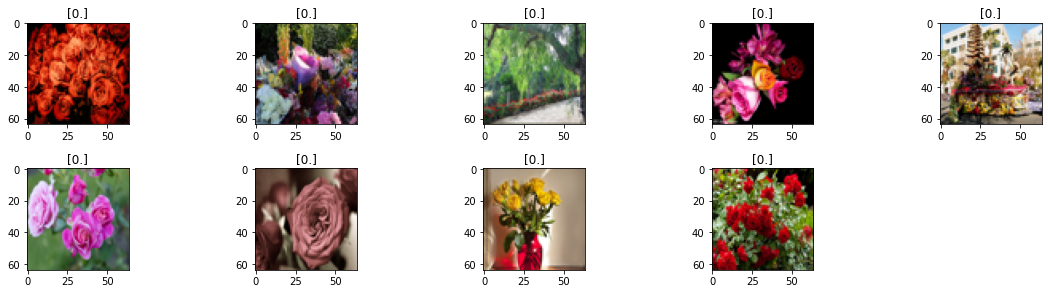

In [224]:
# Création d'une figure
plt.figure(figsize=(16,8))

# Une boucle sur les 9 premières images et leurs étiquettes pour les afficher
for i in range(1,10):
    plt.subplot(4,5,i) # sous graphique
    plt.imshow(x_train[i],cmap='gray')     # Affiche l'image (x_train[i])
    plt.title(y_train[i])   # Ajoute le titre du sous graphique en affichant les étiquettes
    plt.tight_layout() # Ajustement
plt.show()

In [225]:
# Réorganise les données d'entrainement x_train pour qu'elles soient de forme (nombre d'échantillons, -1)
# et divise toutes les valeurs par la valeur maximale de x_train pour normaliser les données.
x_train_reshape=x_train.reshape(x_train.shape[0],-1)/x_train.max()

In [226]:
# Affiche la dimension des données d'entraînement x_train_reshape après la transformation et la normalisation.
print(x_train_reshape.shape)

(1230, 12288)


In [227]:
# Calcule la valeur maximale dans les données d'entrainement x_train_reshape après la transformation et la normalisation.
x_train_reshape.max()

1.0

In [228]:
# Réorganise les données d'entrainement x_test pour qu'elles soient de forme (nombre d'échantillons, -1)
# et divise toutes les valeurs par la valeur maximale de x_train pour normaliser les données.
x_test_reshape=x_test.reshape(x_test.shape[0],-1)/x_train.max()

In [229]:
# Affiche la dimension des données d'entraînement x_test_reshape après la transformation et la normalisation.
print(x_test_reshape.shape)

(318, 12288)


In [230]:
# Calcule la valeur maximale dans les données d'entrainement x_test_reshape après la transformation et la normalisation.
x_test_reshape.max()

1.0

In [231]:
# Initialisation des paramètres du modèle
def initialisation(X):
    W=np.random.randn(X.shape[1],1)
    b=np.random.randn(1)
    return (W, b)

In [232]:
#Calcule la sortie d'un modèle basé sur une combinaison linéaire des caractéristiques d'entrée X avec des poids W et un biais b, suivi de l'application de la fonction sigmoïde.
def model(X,W,b):
    Z=X.dot(W)+b
    A=1/(1+np.exp(-Z))
    return A

In [233]:
# Régression logisitique
# Calcul du coût (la perte)
def logLoss(A,y):  # Ai est la probabilité prédite par le modèle pour i
    epsilon=1e-15
    return 1/len(y)*np.sum(-y*np.log(A+epsilon)-(1-y)*np.log(1-A+epsilon))

In [234]:
# Gradients
# Calcul les gradients de la perte par rapport aux paramètres ( poids et vecteur)
def gradients (A,X,y):
    dW=1/len(y)*np.dot(X.T,A-y)
    db=1/len(y)*sum(A-y)
    return (dW,db)

In [235]:
# Mettre à jour les paramètres (poids et vecteur) en utilisant les gradients utilisés
def update(dW,db, W, b, learning_rate):
    W=W-learning_rate*dW
    b=b-learning_rate*db
    return (W,b)

In [236]:
# Faire les prédictions à l'aide d'un modèle Rlogi
def prediction(X,W,b):
    A=model(X,W,b)
    #print(A)
    return A>=0.5

In [237]:
# Entraîne un modèle de régression logistique (neurone artificiel) en utilisant la descente de gradient stochastique.
def artificialNeuron(x_train,y_train,x_test,y_test, learning_rate=0.01, n_iter=15000):
    #initialisation
    W,b=initialisation(x_train)
    train_cout=[]
    train_accuracy=[]
    test_cout=[]
    test_accuracy=[]
    cout=[]
    accuracy=[]
    for i in tqdm(range(n_iter)):
        # activation
        A=model(x_train,W,b)
        if i%10==0:
        #train cout/accuracy
            train_cout.append(logLoss(A,y_train))
            #precision
            y_pred=prediction(x_train,W,b)
            train_accuracy.append(accuracy_score(y_train,y_pred))
        #test cout/accuracy
            A_test=model(x_test, W,b)
            test_cout.append(logLoss(A_test,y_test))
            #precision
            y_pred=prediction(x_test,W,b)
            test_accuracy.append(accuracy_score(y_test,y_pred))
        #mise à jour
        dW,db=gradients(A,x_train,y_train)
        W,b= update(dW,db,W,b,learning_rate)

    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(train_cout, label='train_cout')
    plt.plot(test_cout, label='test_cout')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(train_accuracy, label='train_accuracy')
    plt.plot(test_accuracy, label='test_accuracy')
    plt.legend()
    plt.show()
    return (W,b)

100%|██████████| 15000/15000 [05:14<00:00, 47.64it/s]


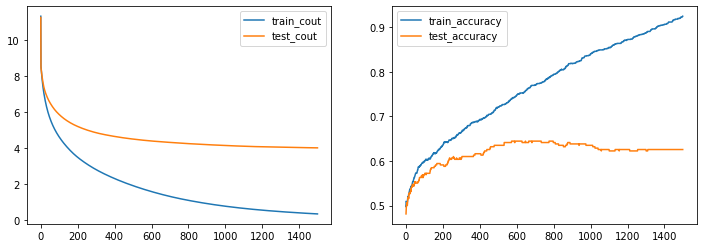

In [238]:
# Appel de la fonction et affichage des courbes de coût et d'exactitude pour l'entraînement et le test
W,b=artificialNeuron(x_train_reshape,y_train,x_test_reshape, y_test)

Voir si l'image est une tulipe ou une rose

(1, 12288)


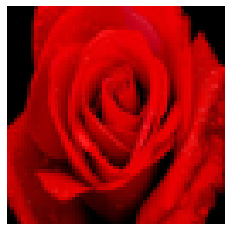

Rose [[0.99999919]]


In [239]:
def predict_single_image(image_path, W, b, image_size=(64, 64)):
    img = Image.open(image_path)
    img = img.resize(image_size)
    img_array = np.array(img).reshape(1, -1) / 255.0
    print(img_array.shape)

    prediction = model(img_array, W, b)

    # Afficher l'image
    plt.imshow(img)
    plt.axis('off')  # Masquer les axes
    plt.show()

    if prediction >= 0.5:
        print("Rose", prediction)
    else:
        print("Tulipe", prediction)

# Utilisation de la fonction pour prédire une image
image_path_to_predict = 'donnees_basique/test/rose/rose2.jpg'
predict_single_image(image_path_to_predict, W, b)